*DAIA - Week 4 Assignment*

# Missing data in the Titanic dataset

## 1. Introduction

In this titanic example we will focus on how to find, label and deal with missing data. Make sure you have studies the study materials in Canvas about the various types of missing data and how to handle these kind of missing data.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Data collection

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [48]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## To get you started...
df_titanic = pd.read_csv("Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic.head(5)

numpy version: 1.20.3
matplotlib version: 1.3.4


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## 3.  Data understanding

You can examine the datatypes and some general (statistical) information about the dataset. See if you can already see something odd or striking, which indicates missing data.

In [49]:
df_titanic.dtypes

## Why is it good to first check the datatypes, before examining the columns or values for missing data?

## Your answer (and explanation):


passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

By looking at the datatypes it becomes much easier to spot initial problems with the data structure such as that there are currently only 3 numerical features, which greatly limits the data to work with.  
  
I also notice that some features used for categorization such as sex, pclass and home/dest are currently stored in as a string, this is also not optimal for use during machine learning and should consider switching it to just id's or split the values into seperate columns such as class1, class2, class3.

Which columns contain missing values? You should find at least 3 (4 is better ;) ). 

In [50]:
## Your code and comments here...
print(df_titanic.info(), "\n")
print(df_titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   passengers  1313 non-null   int64  
 1   pclass      1313 non-null   object 
 2   survived    1313 non-null   int64  
 3   name        1313 non-null   object 
 4   age         633 non-null    float64
 5   embarked    821 non-null    object 
 6   home/dest   754 non-null    object 
 7   room        77 non-null     object 
 8   ticket      69 non-null     object 
 9   boat        347 non-null    object 
 10  sex         1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB
None 

passengers       0
pclass           0
survived         0
name             0
age            680
embarked       492
home/dest      559
room          1236
ticket        1244
boat           966
sex              0
dtype: int64


It seems that there is a lot of missing data for the room and tickets, in fact there only seem to be ~100 filled in records for these features.  
Other features with missing data are the boat, home/dest, embarked and age.

Next step is to examine and explain *why* these values are missing. Remember MCAR, MAR, M(C)NAR... Don't forget to use visualization (histograms might be useful) as well to investigate or explain this.

In [51]:
## Your code and comments....
print("first class:\n", df_titanic[df_titanic["pclass"] == "1st"].isnull().sum())
print("\nSecond class:\n", df_titanic[df_titanic["pclass"] == "2nd"].isnull().sum())
print("\nThird class:\n", df_titanic[df_titanic["pclass"] == "3rd"].isnull().sum())

first class:
 passengers      0
pclass          0
survived        0
name            0
age            96
embarked       10
home/dest      33
room          258
ticket        277
boat          110
sex             0
dtype: int64

Second class:
 passengers      0
pclass          0
survived        0
name            0
age            68
embarked        8
home/dest      16
room          267
ticket        259
boat          184
sex             0
dtype: int64

Third class:
 passengers      0
pclass          0
survived        0
name            0
age           516
embarked      474
home/dest     510
room          711
ticket        708
boat          672
sex             0
dtype: int64


In [52]:
print("First class:", len(df_titanic[df_titanic["pclass"] == "1st"].index))
print("\nSecond class:", len(df_titanic[df_titanic["pclass"] == "2nd"].index))
print("\nThird class:", len(df_titanic[df_titanic["pclass"] == "3rd"].index))

First class: 322

Second class: 280

Third class: 711


Good resource for the 3 suggested different kinds of missing data can be found [here](https://stefvanbuuren.name/fimd/sec-MCAR.html)
  
Above I have displayed the three different classes with their missing values. 
It seems that the third class has a lot more missing data, for features such as embarked and home/dest this could have been caused by a lot more people being third class and therefore more data to be missing because of busieness on the given day.

Seen as the difference between amount of third class passengers and the amount of missing data per class, it can be ruled out that there is no fixed random loss of data and that this is specific to the third class.  
  
Furthermore for the boat feature it could be considered that for second and third class the same amount of people (~100) made it onto a life boat, while first class had about double the amount of people, which would make sense with the favorably layout of the rooms on the boat.

In [53]:
print("First class:", len(df_titanic[(df_titanic['pclass'] == "1st") & ((df_titanic['sex'] == "female") | (df_titanic['age'] < 18))].index), "/", len(df_titanic[df_titanic["pclass"] == "1st"].index))
print("\nSecond class:", len(df_titanic[(df_titanic['pclass'] == "2nd") & ((df_titanic['sex'] == "female") | (df_titanic['age'] < 18))].index), "/", len(df_titanic[df_titanic["pclass"] == "2nd"].index))
print("\nThird class:", len(df_titanic[(df_titanic['pclass'] == "3rd") & ((df_titanic['sex'] == "female") | (df_titanic['age'] < 18))].index), "/", len(df_titanic[df_titanic["pclass"] == "3rd"].index))

First class: 149 / 322

Second class: 120 / 280

Third class: 236 / 711


After looking at the amount of women and children that were on the boat (these were generally preffered when choosing who got a lifeboat), my previous observation seems to track, around the same amount of first and second class passengers have a value for the lifeboats as the amount of women and children, while a much smaller proportion from the third class was able to make it to the lifeboats.

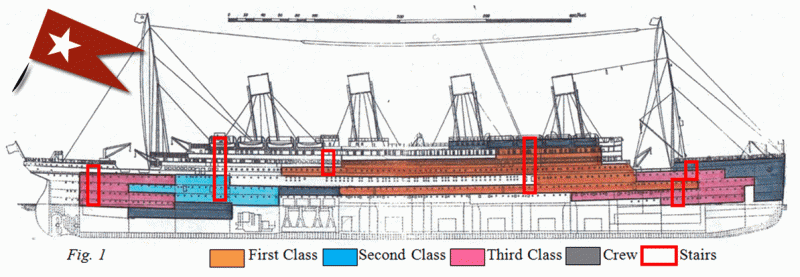

## 4. Data Preparation

### 4.1. Deal with Missing Values

You have found some (indications, clues for) missing data. Under 'Data Understanding' you have looked for reasons why and perhaps also found some relationships with other values or features. That helps you to 'label' the type of missing data. Now it's time to deal with the missing values. It could be a requirement of the  machine learning model that it needs a complete set of values for a feature. There are several options as you know. Deleting rows can reduce missing values, but it also reduces the total amount of data... Another way is to fill  it in with guesses. You will be introducing some noise into a model, but if you canmake reasonable guesses, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of the model might still make a better model than before. 

#### Look at the features with missing data and explain and apply a suitable method to deal with these missing values...

I will be filling in the missing ages with an average based on the row's class and gender. During the exercise focused on this same dataset for machine learning i found that there is a significant difference between these categorized groups.

In [54]:
# Single line setting mean based on a column's uniques, returns a list that can be used for conditional operations
# print('mean ages gender based:', df_titanic.groupby("Gender")["age"].transform("mean").unique())
# print('mean ages class based:', df_titanic.groupby("PClass")["age"].transform("mean").unique())
# Another way to just get a touple with all options
# df_titanic.groupby('Gender').mean().age

avgAge = (df_titanic.groupby("sex")["age"].transform("mean") + df_titanic.groupby("pclass")["age"].transform("mean"))/2
print('mean ages combined:', avgAge.unique())
df_titanic['age'] = df_titanic["age"].fillna(avgAge)

# Could probably also get away with numpy where()
# df_titanic['AgeFill'] = np.where(df_titanic['sex'] == 0, df_titanic[df_titanic['sex'] == 0].mean() , df_titanic[df_titanic['sex'] == 1].mean())
df_titanic[403:850]

mean ages combined: [35.12023774 35.6245915  29.94086208 29.43650831 28.05053397 27.54618021]


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
403,404,2nd,0,"Faunthorpe, Mr Harry",29.940862,Southampton,"England / Philadelphia, PA",NaN,NaN,-286,male
404,405,2nd,1,"Faunthorpe, Mrs Lizzie (see Wilkinson, E.)",29.436508,NaN,NaN,NaN,NaN,NaN,female
405,406,2nd,0,"Fillbrook, Mr Charles",29.940862,Southampton,"Cornwall / Houghton, MI",NaN,NaN,NaN,male
406,407,2nd,0,"Fox, Mr Stanley H.",38.000000,Southampton,"Rochester, NY",NaN,229236 L13,-236,male
407,408,2nd,0,"Frost, Mr Anthony (Archie) W.",29.940862,NaN,Belfast,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...
845,846,3rd,0,"Hampe, Mr Leon",28.050534,NaN,NaN,NaN,NaN,NaN,male
846,847,3rd,0,"Hansen, Mr Claus Peter",28.050534,NaN,NaN,NaN,NaN,NaN,male
847,848,3rd,1,"Hansen, Mrs Claus Peter",27.546180,NaN,NaN,NaN,NaN,NaN,female
848,849,3rd,0,"Hansen, Mr Henrik Juul",28.050534,NaN,NaN,NaN,NaN,NaN,male


This method is actually not the most optimal as it uses the broad average of gender and class, below is a version where the average has been gotten from an even more narrow part of the given data.

In [55]:
avgAge = df_titanic.groupby(["sex", "pclass"])["age"].transform("mean")
print('mean ages combined:', avgAge.unique())
df_titanic['age'] = df_titanic["age"].fillna(avgAge)
df_titanic[403:850]

mean ages combined: [36.99335654 39.51756783 29.18466044 27.80937554 27.29590127 26.21300851]


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
403,404,2nd,0,"Faunthorpe, Mr Harry",29.940862,Southampton,"England / Philadelphia, PA",NaN,NaN,-286,male
404,405,2nd,1,"Faunthorpe, Mrs Lizzie (see Wilkinson, E.)",29.436508,NaN,NaN,NaN,NaN,NaN,female
405,406,2nd,0,"Fillbrook, Mr Charles",29.940862,Southampton,"Cornwall / Houghton, MI",NaN,NaN,NaN,male
406,407,2nd,0,"Fox, Mr Stanley H.",38.000000,Southampton,"Rochester, NY",NaN,229236 L13,-236,male
407,408,2nd,0,"Frost, Mr Anthony (Archie) W.",29.940862,NaN,Belfast,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...
845,846,3rd,0,"Hampe, Mr Leon",28.050534,NaN,NaN,NaN,NaN,NaN,male
846,847,3rd,0,"Hansen, Mr Claus Peter",28.050534,NaN,NaN,NaN,NaN,NaN,male
847,848,3rd,1,"Hansen, Mrs Claus Peter",27.546180,NaN,NaN,NaN,NaN,NaN,female
848,849,3rd,0,"Hansen, Mr Henrik Juul",28.050534,NaN,NaN,NaN,NaN,NaN,male


In [56]:
print(df_titanic.isnull().sum())

passengers       0
pclass           0
survived         0
name             0
age              0
embarked       492
home/dest      559
room          1236
ticket        1244
boat           966
sex              0
dtype: int64


Seen as all other missing data are values that would be absolute for the passenger itself, such as that not all passengers had a lifeboat and that filling in the home/dest for passengers would not improve the dataset in a meaningfull way and would only create more possible bias.